# Min-Distance Classifier

In [ ]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import random
from sklearn import datasets

import numpy as np

## Generate dataset

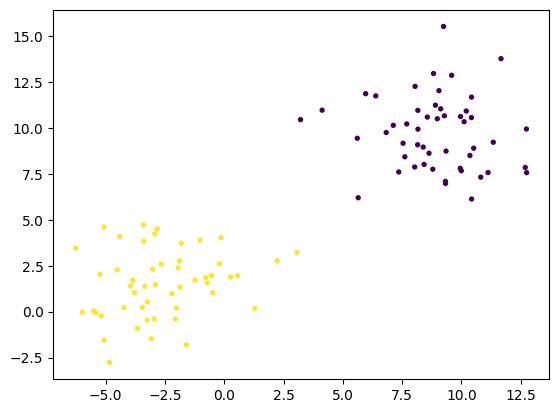

In [ ]:
X,y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
plt.scatter(X[:,0],X[:,1],c=y,s=8)


# Set Prototype

In [ ]:
X_type1 = np.array(X[y == 0])
X_type1 = np.mean(X_type1, axis=0)
X_type2 = np.array(X[y == 1])
X_type2 = np.mean(X_type2, axis=0)


In [ ]:
#gi(x) = xiT*x - (1/2)*xiT*xi,
#Sij=g(i)-g(j)=0
# X_type1_transpose = np.transpose(X_type1)
# X_type2_transpose = np.transpose(X_type2)
w1 =(-1/2)* np.dot(X_type1,X_type1) #+ X_type1*X
w2 =(-1/2)* np.dot(X_type2,X_type2) #+ X_type2*X



In [ ]:
X_type1

array([8.8978199 , 9.71434169])

In [ ]:
# g1: X_type1[0]*x+X_type1[1]*y+w1=0
# g2: X_type2[0]*x+X_type2[1]*y+w2=0
# s1: g1-g2=0

In [ ]:
surface_x=np.linspace(-5, 8, 100)
surface_y=(-(w1-w2)-(X_type1[0]-X_type2[0])*surface_x)/(X_type1[1]-X_type2[1])

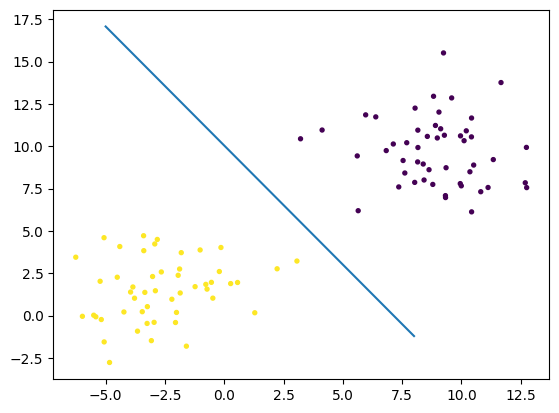

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=8)
# draw decision surface
plt.plot(surface_x, surface_y)
plt.show()

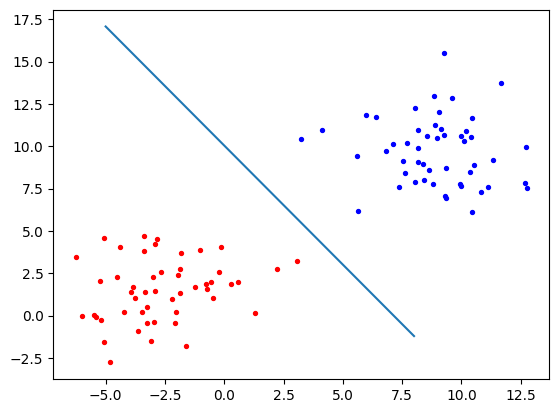

In [ ]:
bias=0
for a,b in X:
  descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)
  if descriminator>0:
    plt.scatter(a,b,c='blue',s=8)
  else:
    plt.scatter(a,b,c='red',s=8)

surface_y=(-(w1-w2)-(X_type1[0]-X_type2[0])*surface_x-bias)/(X_type1[1]-X_type2[1])
plt.plot(surface_x, surface_y)
plt.show()

## Training process

In [ ]:
bias=0
learning_rate=0.5
for epoce in range(10):
  for i,zz in enumerate(X):
    a,b=zz
    descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)+bias
    if descriminator>0:
      if y[i]!=0:
        bias=bias+(y[i]-descriminator)*learning_rate
    else:
      if y[i]!=1:
        bias=bias+(y[i]-descriminator)*learning_rate



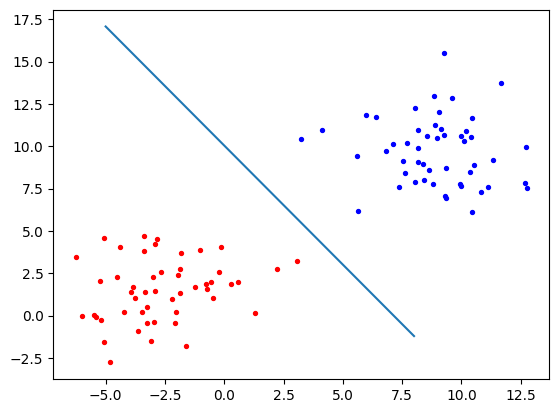

In [ ]:
for a,b in X:
  descriminator=(X_type1[0]-X_type2[0])*a+(X_type1[1]-X_type2[1])*b+(w1-w2)+bias
  if descriminator>0:
    plt.scatter(a,b,c='blue',s=8)
  else:
    plt.scatter(a,b,c='red',s=8)

surface_y=(-(w1-w2)-(X_type1[0]-X_type2[0])*surface_x-bias)/(X_type1[1]-X_type2[1])
plt.plot(surface_x, surface_y)
plt.show()

# Perceptron

In [ ]:
import numpy as np
class Perceptron:
	# Single layer
	def __init__(self, N, learning_rate=0.1):
		self.W = np.random.randn(N + 1) / np.sqrt(N)
		self.learning_rate = learning_rate
	def step(self, x):
		return 1 if x > 0 else 0
	def fit(self, X, y, epochs=10):
		# inser the one to calculate bias
		X = np.c_[X, np.ones((X.shape[0]))]
		for epoch in range(epochs):
			for (x, target) in zip(X, y):
				p = self.step(np.dot(x, self.W))
				if p != target:
					error = p - target
					self.W += -self.learning_rate * error * x
	def activate(self, X):
		cal=np.dot(x, self.W)
	def predict(self, X, addBias=True):
		X = np.atleast_2d(X)
		if addBias:
			X = np.c_[X, np.ones((X.shape[0]))]
		return self.step(np.dot(X, self.W))

In [ ]:
p = Perceptron(X.shape[1], learning_rate=0.1)
p.fit(X, y, epochs=20)

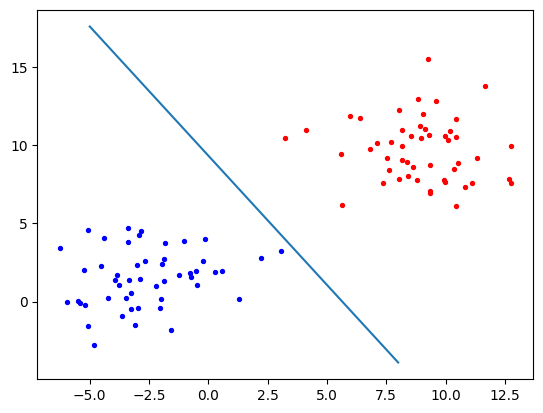

In [ ]:
for (x, target) in zip(X, y):
  pred = p.predict(x)
  if pred>0:
    plt.scatter(x[0],x[1],c='blue',s=8)
  else:
    plt.scatter(x[0],x[1],c='red',s=8)
w=p.W
surface_y=(-(w[2])-(w[0])*surface_x)/(w[1])
plt.plot(surface_x, surface_y)
plt.show()

## XOR problem

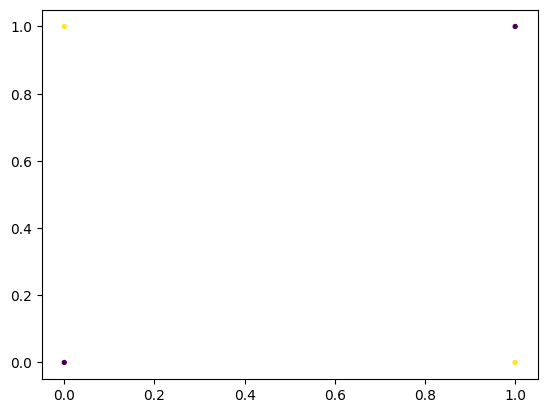

In [ ]:
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
plt.scatter(X[:,0],X[:,1],c=y,s=8)


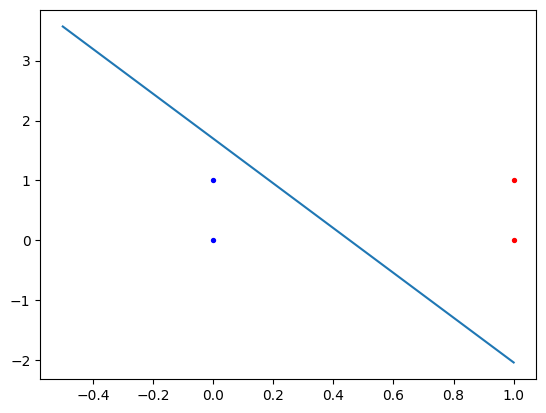

In [ ]:
p = Perceptron(X.shape[1], learning_rate=0.1)
p.fit(X, y, epochs=20)

for (x, target) in zip(X, y):
  pred = p.predict(x)
  if pred>0:
    plt.scatter(x[0],x[1],c='blue',s=8)
  else:
    plt.scatter(x[0],x[1],c='red',s=8)
w=p.W
surface_x=np.linspace(-0.5, 1, 10)
surface_y=(-(w[2])-(w[0])*surface_x)/(w[1])
plt.plot(surface_x, surface_y)
plt.show()

We can see, Single layer perceptron cannot solve this problem

# Multi layer Perceptron


In [284]:
import numpy as np
def custom_transpose(arr):
    if arr.ndim == 1:
        return arr.reshape(-1, 1)
    else:
        return arr.T
def to_row_vector(arr):
    if arr.ndim == 1:
        arr = arr.reshape(1, -1)
    return arr
class multi_Perceptron:
  def __init__(self, network_structure=[2,5,1], learning_rate=0.1):
    self.W=[]
    self.layer_num=len(network_structure)-1
    for i in range(self.layer_num):
      self.W.append(np.random.randn(network_structure[i],network_structure[i+1]))
    self.learning_rate = learning_rate

  def out(self, net,theat=0,theat_0=1):
    # sigmoid
   result=1/(1+np.exp(-(net-theat)/theat_0))
   return result
  def differential_out(self,out1):
    return out1*(1-out1)
  def fit(self, X, y, epochs=1000,momentum=0):
    self.training_weight_delta=[]
    temp_loss=[]
    for epoch in range(epochs):
      for (x, target) in zip(X, y):
        output_list=[None]*self.layer_num

        temp_input=x
        for j in range(self.layer_num):
          temp_net=np.dot(temp_input,self.W[j])
          predicted_output=self.out(temp_net)
          temp_input=predicted_output
          output_list[j]=predicted_output
        loss = np.sum((target-predicted_output)**2) / 2
        temp_loss.append(loss)
        delta_list=[None]*self.layer_num
        temp_error=target-predicted_output
        for j in range(self.layer_num-1,-1,-1):

          temp_delta=np.multiply(temp_error,self.differential_out(output_list[j]))

          delta_list[j]=to_row_vector(temp_delta)
          if j==0: break
          temp_error=np.multiply(temp_delta ,custom_transpose(self.W[j]))

        temp_input=custom_transpose(x)
        weight_delta_list=[None]*self.layer_num
        if epoch==0:
          momentum_weight=[None]*self.layer_num
          for index in range(self.layer_num):
            momentum_weight[index] = 0;
        else:
            momentum_weight=self.training_weight_delta[epoch-1]

        for j in range(self.layer_num):
            delta_weight=self.learning_rate*np.dot(temp_input,delta_list[j])+momentum*momentum_weight[j]
            weight_delta_list[j]=delta_weight

            self.W[j]+=delta_weight
            temp_input=custom_transpose(output_list[j])
        self.training_weight_delta.append(weight_delta_list)

      if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {np.mean(temp_loss)}')
  def predict(self, X):
    temp_input=X
    for j in range(self.layer_num):
      temp_net=np.dot(temp_input,self.W[j])
      predicted_output=self.out(temp_net)
      temp_input=predicted_output
    return predicted_output

In [285]:
p = multi_Perceptron(learning_rate=0.5)
p.fit(X, y, epochs=1000)

Epoch 0, Loss: 0.1380782249403061
Epoch 100, Loss: 0.1298111142104078
Epoch 200, Loss: 0.12213369184068111
Epoch 300, Loss: 0.1091946819831167
Epoch 400, Loss: 0.0934386427708969
Epoch 500, Loss: 0.07974268139540558
Epoch 600, Loss: 0.0690617568947796
Epoch 700, Loss: 0.060776431467212545
Epoch 800, Loss: 0.05423424500064073
Epoch 900, Loss: 0.04896033370291203


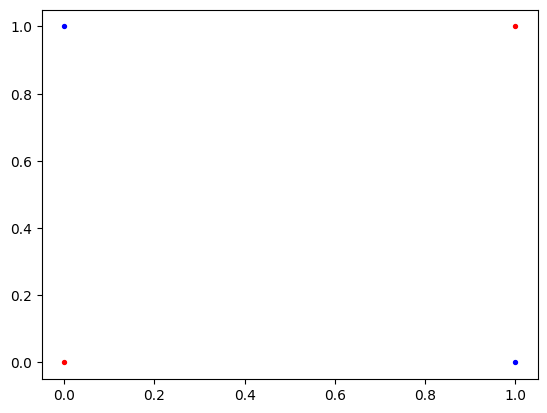

In [286]:
for (x, target) in zip(X, y):
  pred = np.round(p.predict(x))
  if pred>0:
    plt.scatter(x[0],x[1],c='blue',s=8)
  else:
    plt.scatter(x[0],x[1],c='red',s=8)
# plt.legend(['Class 0', 'Class 1'])
plt.show()